In [1]:
#5th main stuff
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
X = pd.DataFrame(data = iris.data, columns = iris.feature_names)

X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
target_names = iris.target_names

target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
# assigns y values to var 'y'
y = iris.target

**EDA**

Text(0, 0.5, 'sepal width (cm)')

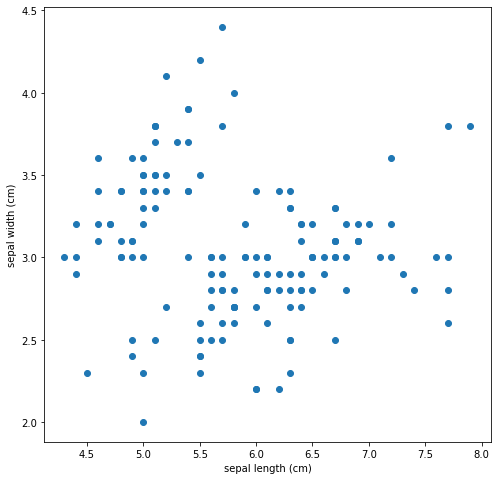

In [5]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(X["sepal length (cm)"], X["sepal width (cm)"])
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")

Text(0, 0.5, 'iris type')

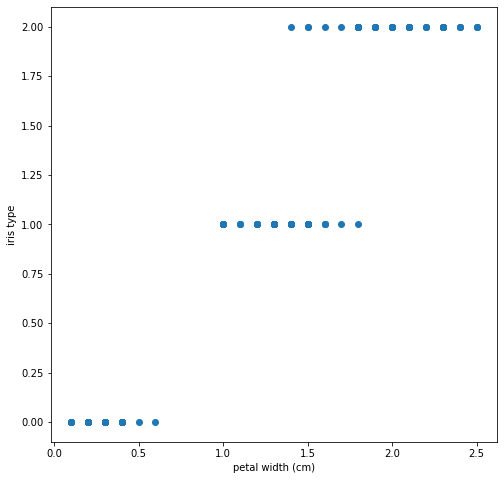

In [6]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(X["petal width (cm)"], pd.DataFrame(data = y))
plt.xlabel("petal width (cm)")
plt.ylabel("iris type")

# shows iris_virginica(2) has wider petals than the other flower species.

Text(0, 0.5, 'iris type')

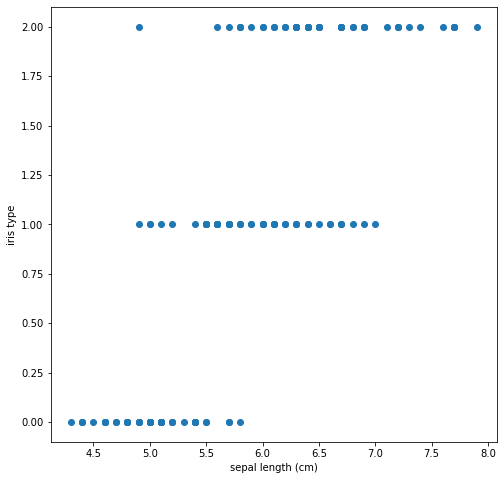

In [7]:
fig, ax = plt.subplots(figsize = (8, 8))

plt.scatter(X["sepal length (cm)"], pd.DataFrame(data = y))
plt.xlabel("sepal length (cm)")
plt.ylabel("iris type")

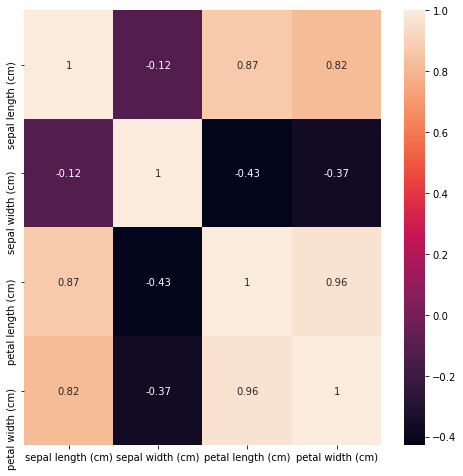

In [8]:
# corr mat
iris_corr = X.corr()

plt.figure(figsize = (8, 8))
sns_heatmap = sns.heatmap(iris_corr, annot=True)

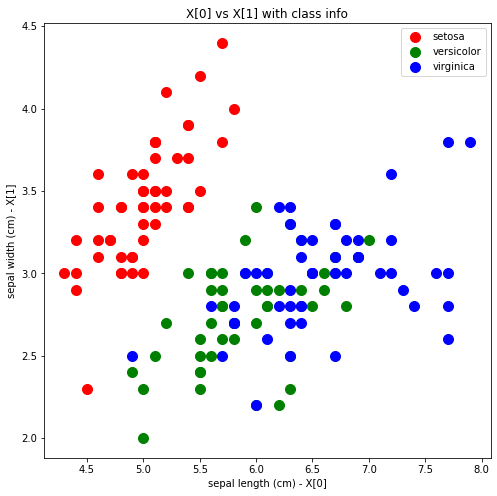

In [9]:
# viz on how diff cat of iris flowers(species are seperated)
fig, ax = plt.subplots(figsize = (8, 8))

x = np.array(X)  # conv X dataframe to np array

for c, i, target_names in zip("rgb", [0, 1, 2], target_names): # iters through 3 classes of iris_flowers
    # plt sepal length and sepal width
    plt.scatter(x[y == i, 0], x[y == i, 1], c = c, s= 100, label= target_names)
    
plt.title("X[0] vs X[1] with class info")
plt.xlabel("sepal length (cm) - X[0]")
plt.ylabel("sepal width (cm) - X[1]")

plt.legend()
plt.show()

**LDA**

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)  # n_components is num of reduced dim

X_new = lda.fit_transform(X, y)

In [11]:
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [12]:
X_new = pd.DataFrame(X_new)
X_new.head()

,0,1
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463


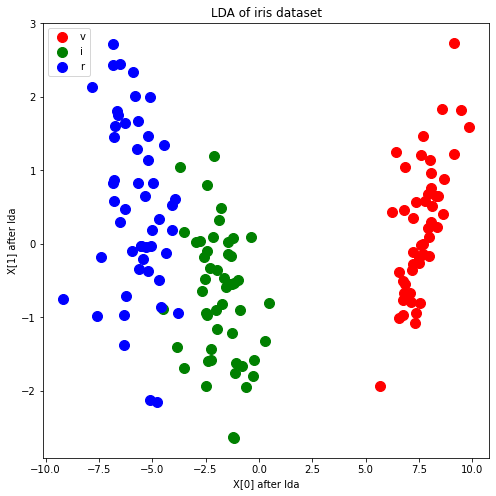

In [13]:
# viz lda work
# viz on how diff cat of iris flowers(species are seperated)
fig, ax = plt.subplots(figsize = (8, 8))

x_new = np.array(X_new)  # conv X dataframe to np array

for c, i, target_names in zip("rgb", [0, 1, 2], target_names): # iters through 3 classes of iris_flowers
    # plt sepal length and sepal width
    plt.scatter(x_new[y == i, 0], x_new[y == i, 1], c = c, s= 100, label= target_names)
    
plt.title("LDA of iris dataset")
plt.xlabel("X[0] after lda")
plt.ylabel("X[1] after lda")

plt.legend()
plt.show()

In [15]:
# check for corr, since after lda correlation is hardly found
lda_corr = X_new.corr()
lda_corr

,0,1
0,1.000000e+00,-5.950162e-16
1,-5.950162e-16,1.000000e+00


In [17]:
# train log reg model with out lda transformed X
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver = "liblinear", multi_class="auto")
model.fit(X, y)
model.score(X, y)

0.96

In [18]:
# train log reg model with lda transformed data
model = LogisticRegression(solver = "liblinear", multi_class="auto")
model.fit(X_new, y)
model.score(X_new, y)

0.9333333333333333